# ⚛️ H₂ — Ground-State VQE vs Bond Length (Noiseless, UCCSD)

This notebook performs a **bond-length scan** for the hydrogen molecule **H₂**
using the production VQE API:

```python
from vqe.core import run_vqe_geometry_scan
```

We study how the **ground-state energy** varies as a function of the H–H bond
distance using a **UCCSD** ansatz (singles + doubles), which is the canonical
chemistry ansatz for H₂.

---

## Simulation setup

- Molecule: **H₂**
- Geometry: H–H bond length scan
- Distances: **0.5 Å → 2.5 Å** (21 points)
- Basis: **STO-3G**
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Device: `default.qubit`
- Noise: **None** (noiseless)

All heavy lifting (Hamiltonian construction, ansatz building, optimisation loop,
caching, and plotting) is handled entirely by the package.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from vqe.core import run_vqe_geometry_scan
from vqe_qpe_common.molecule_viz import plot_molecule


# 🧬 Bond-Length Grid

We define a simple one-dimensional scan over the H–H bond length.

In [10]:
# H–H bond lengths in Ångström
bond_lengths = np.linspace(0.25, 2.50, 51)
print("Bond-length grid (Å):", bond_lengths)

Bond-length grid (Å): [0.25  0.295 0.34  0.385 0.43  0.475 0.52  0.565 0.61  0.655 0.7   0.745
 0.79  0.835 0.88  0.925 0.97  1.015 1.06  1.105 1.15  1.195 1.24  1.285
 1.33  1.375 1.42  1.465 1.51  1.555 1.6   1.645 1.69  1.735 1.78  1.825
 1.87  1.915 1.96  2.005 2.05  2.095 2.14  2.185 2.23  2.275 2.32  2.365
 2.41  2.455 2.5  ]


# 🚀 Run Geometry Scan via `run_vqe_geometry_scan`

`run_vqe_geometry_scan`:

- Uses the internal H₂ bond-length geometry helper (via `molecule="H2_BOND"`)
- Calls `run_vqe` under the hood for each bond length
- Reuses cached runs when available
- Produces a **Ground-state energy vs bond length** plot and saves it to disk

We use:
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Single seed: `0`
- 30 optimisation steps per geometry


⚙️ Geometry: bond = 0.250

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__d6fa68658448.json
  → Mean E = -0.312269 ± 0.000000 Ha

⚙️ Geometry: bond = 0.295
Step 01/50: E = -0.570425 Ha
Step 02/50: E = -0.569856 Ha
Step 03/50: E = -0.572023 Ha
Step 04/50: E = -0.578223 Ha
Step 05/50: E = -0.575433 Ha
Step 06/50: E = -0.573240 Ha
Step 07/50: E = -0.576160 Ha
Step 08/50: E = -0.578320 Ha
Step 09/50: E = -0.576847 Ha
Step 10/50: E = -0.575300 Ha
Step 11/50: E = -0.576391 Ha
Step 12/50: E = -0.578106 Ha
Step 13/50: E = -0.577999 Ha
Step 14/50: E = -0.576761 Ha
Step 15/50: E = -0.576619 Ha
Step 16/50: E = -0.577696 Ha
Step 17/50: E = -0.578324 Ha
Step 18/50: E = -0.577778 Ha
Step 19/50: E = -0.577175 Ha
Step 20/50: E = -0.577510 Ha
Step 21/50: E = -0.578199 Ha
Step 22/50: E = -0.578233 Ha
Step 23/50: E = -0.577739 Ha
Step 24/50: E = -0.577622 Ha
Step 25/50: E = -0.578050 Ha
Step 26/50: E = -0.578324 Ha
Step 27/50: E =

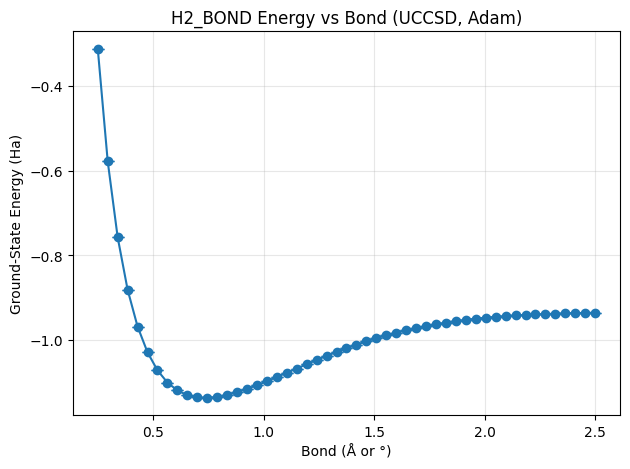

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2_BOND_vqe_geometry_scan_ansUCCSD_optAdam_parambond.png
Minimum energy: -1.137133 ± 0.000000 at bond=0.745


In [ ]:
results = run_vqe_geometry_scan(
    molecule="H2_BOND",
    param_name="bond",
    param_values=bond_lengths,
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    steps=50,
    stepsize=0.2,
    seeds=[0],
    force=False,
    mapping="jordan_wigner",
    show=True,
)

# 📌 Extract Approximate Equilibrium Bond Length

`run_vqe_geometry_scan` returns a list of tuples:

$$
(r, \langle E \rangle, \sigma_E)
$$

where:
- $r$ is the bond length
- $\langle E \rangle$ is the mean ground-state energy over seeds
- $\sigma_E$ is the standard deviation

In [12]:
# Unpack results into arrays
params, mean_E, std_E = zip(*results)
params = np.array(params, dtype=float)
mean_E = np.array(mean_E, dtype=float)
std_E = np.array(std_E, dtype=float)

# Find approximate minimum
min_idx = int(np.argmin(mean_E))
r_opt = params[min_idx]
E_opt = mean_E[min_idx]
dE_opt = std_E[min_idx]

print(f"\nEstimated equilibrium bond length (H–H): {r_opt:.5f} Å")
print(f"Minimum VQE ground-state energy: {E_opt:.8f} ± {dE_opt:.8f} Ha")


Estimated equilibrium bond length (H–H): 0.74500 Å
Minimum VQE ground-state energy: -1.13713295 ± 0.00000000 Ha


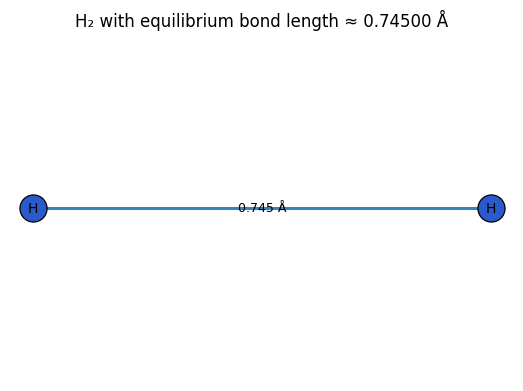

In [13]:
symbols = ["H", "H"]

coords = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, r_opt],
])

plot_molecule(
    symbols,
    coords,
    title=f"H₂ with equilibrium bond length ≈ {r_opt:.5f} Å",
    bonds=[(0, 1)],
    angles=[],
    show_bond_lengths=True,
    show_atom_indices=False,
)
plt.show()


---
## Summary

In this notebook you:

- Used the **production VQE API** (`run_vqe_geometry_scan`) as a pure client
- Performed a **noiseless UCCSD VQE** bond-length scan for **H₂**
- Obtained a **Ground-state energy vs bond length** curve
- Extracted an approximate **equilibrium bond length** from the VQE data

All ansatz construction, Hamiltonian generation, device management,
optimisation, caching, and plotting were handled by the package.